In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
train_dir = "plant_disease/train"
val_dir = "plant_disease/valid"
test_dir = "plant_disease/test"

In [15]:
import os
os.getcwd()

'C:\\Users\\kumar\\Downloads\\Plant disease detection'

In [19]:
import os
os.listdir(r"C:\\Users\\kumar\\Downloads\\Plant disease detection\PlantVillage")

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'PlantVillage',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_healthy',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [25]:
dataset_dir = r"C:\Users\kumar\Downloads\Plant disease detection\PlantVillage"

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with 20% validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data
train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation data
val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 33027 images belonging to 16 classes.
Found 8249 images belonging to 16 classes.


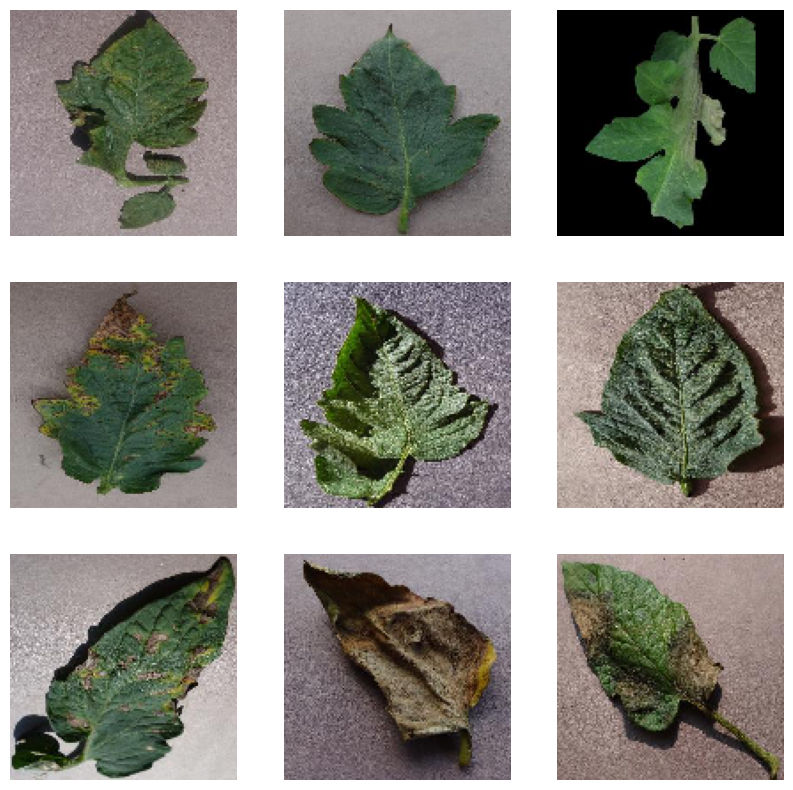

In [29]:
import matplotlib.pyplot as plt

images, labels = next(train_data)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')  # 16 classes
])

model.summary()

C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           2,064 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,306,704 (12.61 MB)

 Trainable params: 3,306,704 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10  
)

C:\Users\kumar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 903s 872ms/step - accuracy: 0.5046 - loss: 1.5353 - val_accuracy: 0.2711 - val_loss: 1.7193
Epoch 2/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 218s 211ms/step - accuracy: 0.5269 - loss: 1.1812 - val_accuracy: 0.1761 - val_loss: 2.1518
Epoch 3/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 215s 208ms/step - accuracy: 0.5380 - loss: 1.0563 - val_accuracy: 0.1669 - val_loss: 2.3421
Epoch 4/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 214s 207ms/step - accuracy: 0.5461 - loss: 0.9955 - val_accuracy: 0.1875 - val_loss: 2.4756
Epoch 5/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 214s 207ms/step - accuracy: 0.5477 - loss: 0.9449 - val_accuracy: 0.1736 - val_loss: 2.6748
Epoch 6/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 262s 253ms/step - accuracy: 0.5545 - loss: 0.9035 - val_accuracy: 0.1348 - val_loss: 3.6406
Epoch 7/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 169s 164ms/step - accuracy: 0.5591 - loss: 0.8679 - val_accuracy: 0.1605 - val_loss: 3.4118
Epoch 8/10
1033/1033 ━━━━━━━━━━━━━━━━━━━━ 162s 157ms/step - ac

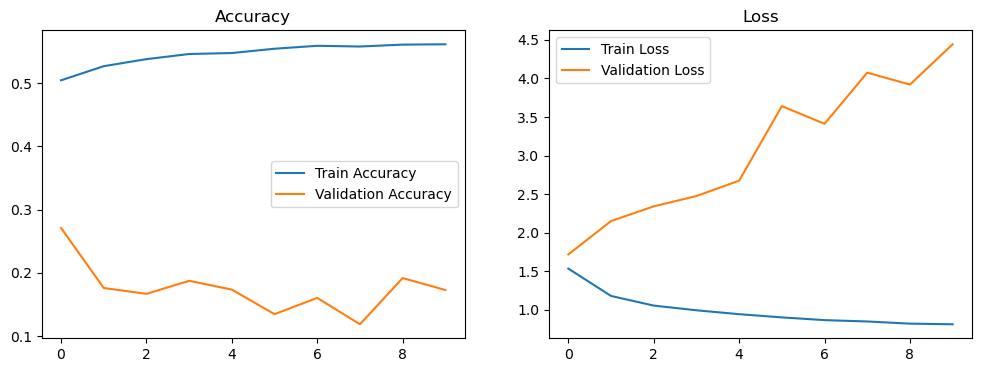

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [67]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

In [69]:
model = load_model("plant_disease_model.keras")

In [71]:
model = load_model(r"C:\Users\kumar\Downloads\Plant disease detection\plant_disease_model.keras")

In [77]:
img_path = r"C:\Users\kumar\Downloads\Plant disease detection\test_images\tomato.jpg"

# Load image and resize to 128x128 (same as training)
img = image.load_img(img_path, target_size=(128, 128))

# Convert image to array
img_array = image.img_to_array(img)

# Normalize pixel values
img_array = img_array / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

In [79]:
# Predict class probabilities
pred = model.predict(img_array)

# Get class index with highest probability
pred_class = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


In [81]:
# Predict class probabilities
pred = model.predict(img_array)

# Get class index with highest probability
pred_class = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [87]:
# Create mapping from index to class name
class_indices = train_data.class_indices 
inv_class_indices = {v: k for k, v in class_indices.items()}

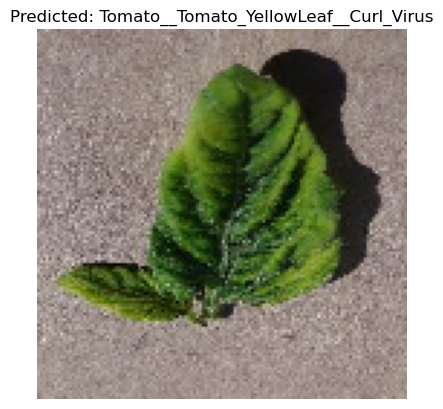

In [89]:
plt.imshow(img)
plt.axis('off')
plt.title("Predicted: " + inv_class_indices[pred_class[0]])
plt.show()

In [91]:
def predict_leaf(image_path, model, class_names):
    from tensorflow.keras.preprocessing import image
    import numpy as np
    import matplotlib.pyplot as plt

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    pred = model.predict(img_array)
    pred_class = np.argmax(pred, axis=1)
    predicted_class_name = class_names[pred_class[0]]

    # Show image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title("Predicted: " + predicted_class_name)
    plt.show()

    return predicted_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


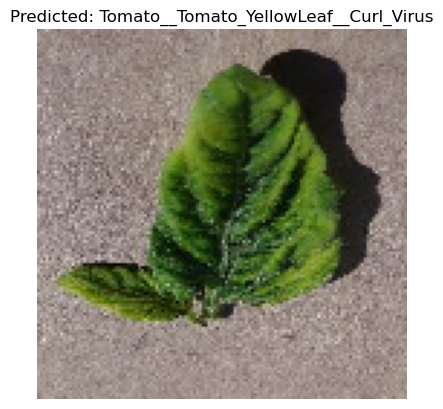

'Tomato__Tomato_YellowLeaf__Curl_Virus'

In [95]:
class_names = list(train_data.class_indices.keys()) 
predict_leaf(r"C:\Users\kumar\Downloads\Plant disease detection\test_images\tomato.jpg", model, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


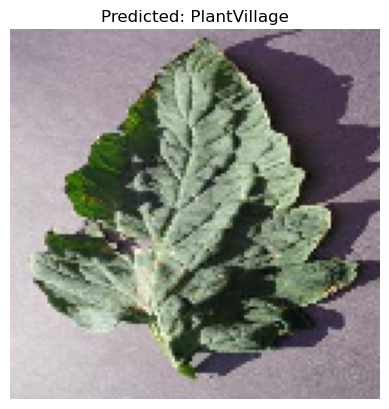

f5cd5835-88bb-40e0-bfc5-920ba1f65674___Com.G_TgS_FL 8350.JPG -> PlantVillage
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


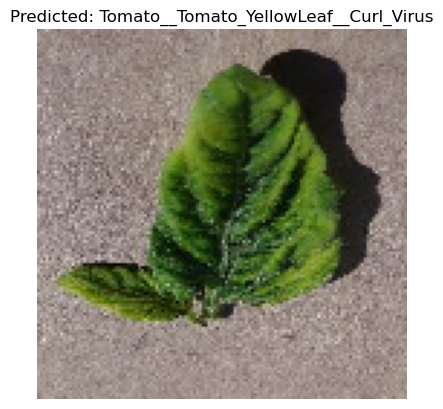

tomato.JPG -> Tomato__Tomato_YellowLeaf__Curl_Virus


In [97]:
test_folder = r"C:\Users\kumar\Downloads\Plant disease detection\test_images"
for img_file in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_file)
    pred = predict_leaf(img_path, model, class_names)
    print(img_file, "->", pred)

In [99]:
from tensorflow.keras.models import load_model
model = load_model("plant_disease_model.keras")